In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Mohammed Umair\OneDrive\Desktop\DS-ML\Datasets And Notebooks\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop("Id",axis=1, inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder = LabelEncoder()

In [7]:
df['Species'] = encoder.fit_transform(df['Species'])

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df = df[df['Species']!=0][['SepalWidthCm', 'PetalLengthCm','Species']]

In [10]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

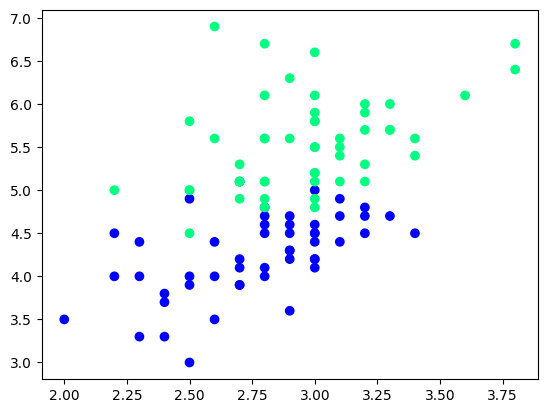

In [12]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'], c = df['Species'], cmap='winter')

In [13]:
df.Species.value_counts()

1    50
2    50
Name: Species, dtype: int64

In [14]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [15]:
df.Species.value_counts()

1    50
2    50
Name: Species, dtype: int64

In [16]:
df_val

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
82,2.7,3.9,1
86,3.1,4.7,1
100,3.3,6.0,2
66,3.0,4.5,1


In [17]:
df_test

,SepalWidthCm,PetalLengthCm,Species
111,2.7,5.3,2
142,2.7,5.1,2
80,2.4,3.8,1
123,2.7,4.9,2
101,2.7,5.1,2


In [18]:
x_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [19]:
y_test

array([1, 1, 1, 2, 1])

# Case 1 - Bagging 
bagging is also knowns as bootstrapping and aggrigation

In [20]:
# Data for tree 1
df_bag = df_train.sample(8,replace=True)
x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
104,3.0,5.8,2
104,3.0,5.8,2
124,3.3,5.7,2
69,2.5,3.9,1
104,3.0,5.8,2
58,2.9,4.6,1
62,2.2,4.0,1
97,2.9,4.3,1


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [22]:
dt_bag1 = DecisionTreeClassifier()

In [23]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

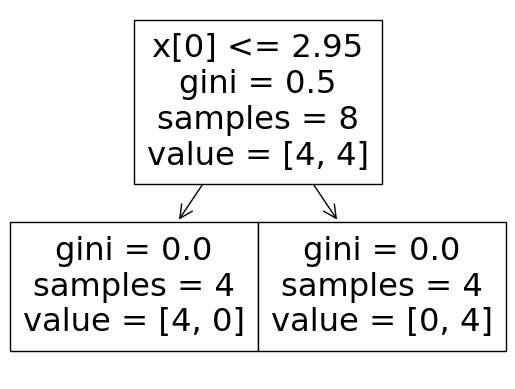

0.6


C:\Users\Mohammed Umair\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [24]:
evaluate(dt_bag1,x,y)

In [25]:
# Data for tree 1
df_bag2 = df_train.sample(8,replace=True)
x = df_bag2.iloc[:,0:2]
y = df_bag2.iloc[:,-1]

df_bag2

,SepalWidthCm,PetalLengthCm,Species
94,2.7,4.2,1
106,2.5,4.5,2
104,3.0,5.8,2
61,3.0,4.2,1
97,2.9,4.3,1
69,2.5,3.9,1
69,2.5,3.9,1
106,2.5,4.5,2


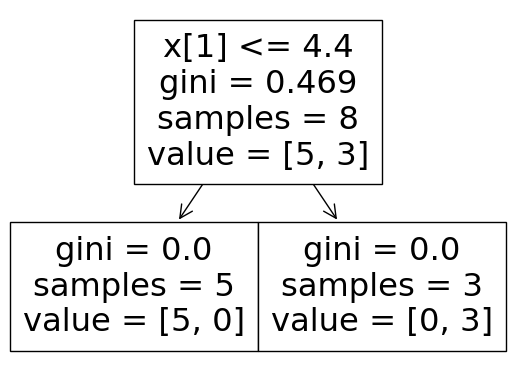

0.6


C:\Users\Mohammed Umair\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [26]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,x,y)

In [27]:
# Data for tree 1
df_bag3 = df_train.sample(8,replace=True)
x = df_bag3.iloc[:,0:2]
y = df_bag3.iloc[:,-1]

df_bag3

,SepalWidthCm,PetalLengthCm,Species
106,2.5,4.5,2
124,3.3,5.7,2
94,2.7,4.2,1
68,2.2,4.5,1
94,2.7,4.2,1
68,2.2,4.5,1
124,3.3,5.7,2
61,3.0,4.2,1


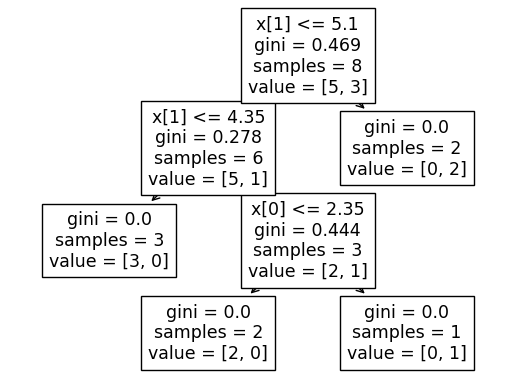

0.6


C:\Users\Mohammed Umair\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [28]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,x,y)

### Prediction

In [29]:
df_test

,SepalWidthCm,PetalLengthCm,Species
111,2.7,5.3,2
142,2.7,5.1,2
80,2.4,3.8,1
123,2.7,4.9,2
101,2.7,5.1,2


In [31]:
print("predictor 1", dt_bag1.predict(np.array([2.7,5.3]).reshape(1,2)))
print("predictor 2", dt_bag2.predict(np.array([2.7,5.3]).reshape(1,2)))
print("predictor 3", dt_bag3.predict(np.array([2.7,5.3]).reshape(1,2)))

predictor 1 [1]
predictor 2 [2]
predictor 3 [2]


C:\Users\Mohammed Umair\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mohammed Umair\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mohammed Umair\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
